TUGAS BESAR MK Pembelajaran Mesin
*   IRAWANSYAH
*   1301174689
*   IFIK-41-03










Import Library apa saja yang akan digunakan

In [1]:
import random as rd
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import warnings
from matplotlib import style
from sklearn import datasets, linear_model
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
files.upload()
datasets = pd.read_csv('air_bnb.csv')
datasets.head()
datasets.shape

Saving air_bnb.csv to air_bnb (1).csv


(22552, 16)

In [4]:
datasets.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,18638.000000,22552.000000,22552.000000
mean,1.571560e+07,5.403355e+07,52.509824,13.406107,67.143668,7.157059,17.840679,1.135525,1.918233,79.852829
std,8.552069e+06,5.816290e+07,0.030825,0.057964,220.266210,40.665073,36.769624,1.507082,3.667257,119.368162
min,2.015000e+03,2.217000e+03,52.345803,13.103557,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.065954e+06,9.240002e+06,52.489065,13.375411,30.000000,2.000000,1.000000,0.180000,1.000000,0.000000
50%,1.686638e+07,3.126711e+07,52.509079,13.416779,45.000000,2.000000,5.000000,0.540000,1.000000,4.000000
75%,2.258393e+07,8.067518e+07,52.532669,13.439259,70.000000,4.000000,16.000000,1.500000,1.000000,129.000000
max,2.986735e+07,2.245081e+08,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


# DATA PRE-PROCESSING

Data Cleaning untuk menghapus row atau kolom  yang memiliki missing values


In [5]:
datasets.dropna(inplace=True)
datasets.shape

(18587, 16)

In [6]:
datasets.isnull().sum().sum()

0

MENGANALISIS DAN MENGEKSPLORASI DATA


Text(0.5, 1.0, 'Comparing price on Reviews per month')

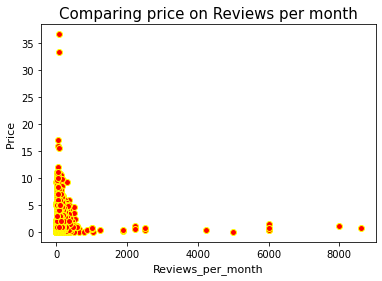

In [7]:
price = datasets['price']
review = datasets['reviews_per_month']
plt.scatter(price, review, c='r', edgecolors='yellow')
plt.ylabel('Price ',fontsize=11)
plt.xlabel('Reviews_per_month',fontsize=11)
plt.title("Comparing price on Reviews per month",fontsize=15)

In [8]:
datasets.groupby("reviews_per_month").size()

reviews_per_month
0.01       3
0.02     153
0.03     606
0.04     299
0.05     317
        ... 
15.51      1
15.88      1
17.01      1
33.43      1
36.67      1
Length: 768, dtype: int64

Text(0.5, 1.0, 'Comparing number of review on Reviews per month on AirBnb')

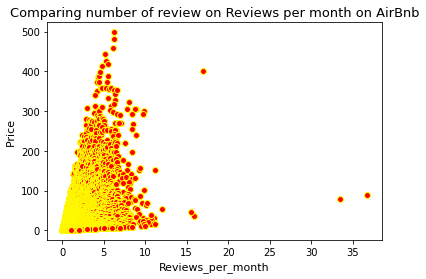

In [9]:
price = datasets['reviews_per_month']
number = datasets['number_of_reviews']
plt.scatter(price, number, c='r', edgecolors='yellow')
plt.ylabel('Price ',fontsize=11)
plt.xlabel('Reviews_per_month',fontsize=11)
plt.title("Comparing number of review on Reviews per month on AirBnb",fontsize=13)

In [10]:
datasets

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22449,29772631,Cosy and lovely room near Ostkreuz,20727291,Anna,Lichtenberg,Neu Lichtenberg,52.502952,13.490870,Private room,25,2,1,2018-11-04,1.00,1,32
22463,29784461,House on the water HT10 - Heart of East Berlin,22437698,Sebastian,Treptow - Köpenick,Oberschöneweide,52.457982,13.526945,Entire home/apt,99,1,5,2018-11-06,5.00,2,339
22475,29792124,Welcome to Light Apartment,224133729,Inna,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.507884,13.467071,Private room,25,1,1,2018-11-05,1.00,1,8
22508,29817383,Prenzlauerberg,224295751,Salem,Pankow,Prenzlauer Berg Nordwest,52.552250,13.410904,Entire home/apt,70,1,1,2018-11-07,1.00,1,350


In [0]:
datasets.drop(datasets[datasets.reviews_per_month > 10].index ,inplace =True)
datasets.drop(datasets[(datasets.number_of_reviews < 10) | (datasets.number_of_reviews >=300) ].index ,inplace =True)

In [12]:
datasets

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
6,14325,Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.547846,13.405562,Entire home/apt,70,90,23,2018-11-01,0.23,3,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,28490425,Charming house in green surroundings,2489651,Judith,Steglitz - Zehlendorf,Zehlendorf Nord,52.447487,13.236621,Private room,50,1,10,2018-10-29,6.12,1,136
21417,28503342,"Cozy room with balcony in typical Berlin ""Altbau""",215141997,Laura,Neukölln,Neuköllner Mitte/Zentrum,52.465538,13.433142,Private room,35,1,12,2018-11-02,7.50,1,69
21463,28558738,Schönes helles Zimmer direkt am Westend,28831542,Julian,Charlottenburg-Wilm.,Schloß Charlottenburg,52.520938,13.286595,Private room,25,1,11,2018-11-04,7.67,1,9
21506,28622624,Beautiful Studio with Balcony - City West,168548569,Carlotta,Charlottenburg-Wilm.,Otto-Suhr-Allee,52.513770,13.315498,Entire home/apt,80,1,10,2018-11-04,6.98,1,37


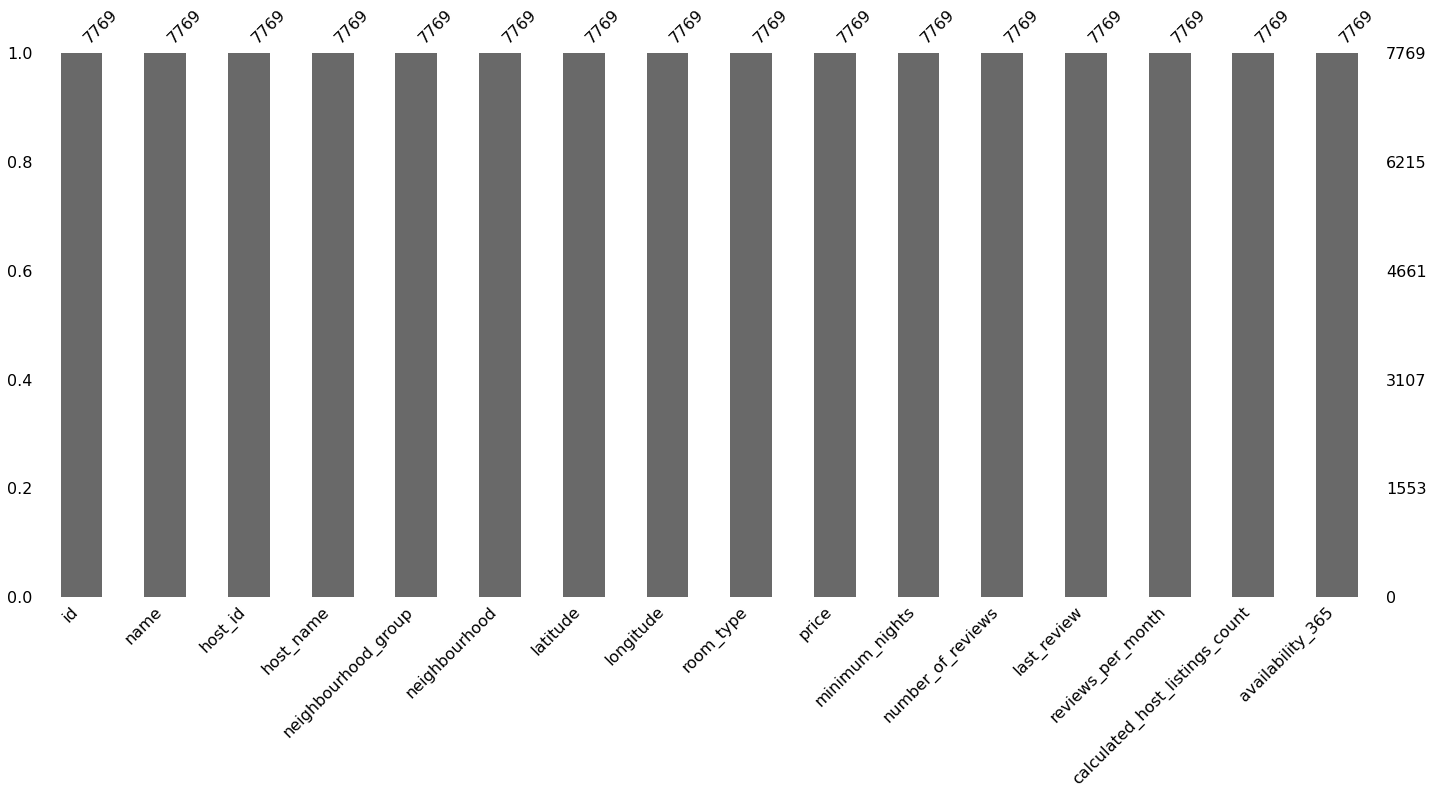

In [13]:
msno.bar(datasets)

Label encoding untuk Memproses Category Data




In [14]:
categorical = datasets.dtypes==object
categorical_cols = datasets.columns[categorical].tolist()
datasets[categorical_cols] = datasets[categorical_cols].apply(lambda col: LabelEncoder().fit_transform(col))
datasets[categorical_cols].head()
print(datasets)

             id  name  ...  calculated_host_listings_count  availability_365
0          2015  1312  ...                               4               141
2          3176  3241  ...                               1               220
3          3309  1329  ...                               1               297
4          7071  1758  ...                               1                26
6         14325   694  ...                               3               129
...         ...   ...  ...                             ...               ...
21412  28490425  2111  ...                               1               136
21417  28503342  2918  ...                               1                69
21463  28558738  5775  ...                               1                 9
21506  28622624   993  ...                               1                37
21837  29029427  6692  ...                               1                 8

[7769 rows x 16 columns]


 Correlation Matrix untuk memilih atribut yang akan digunakan 



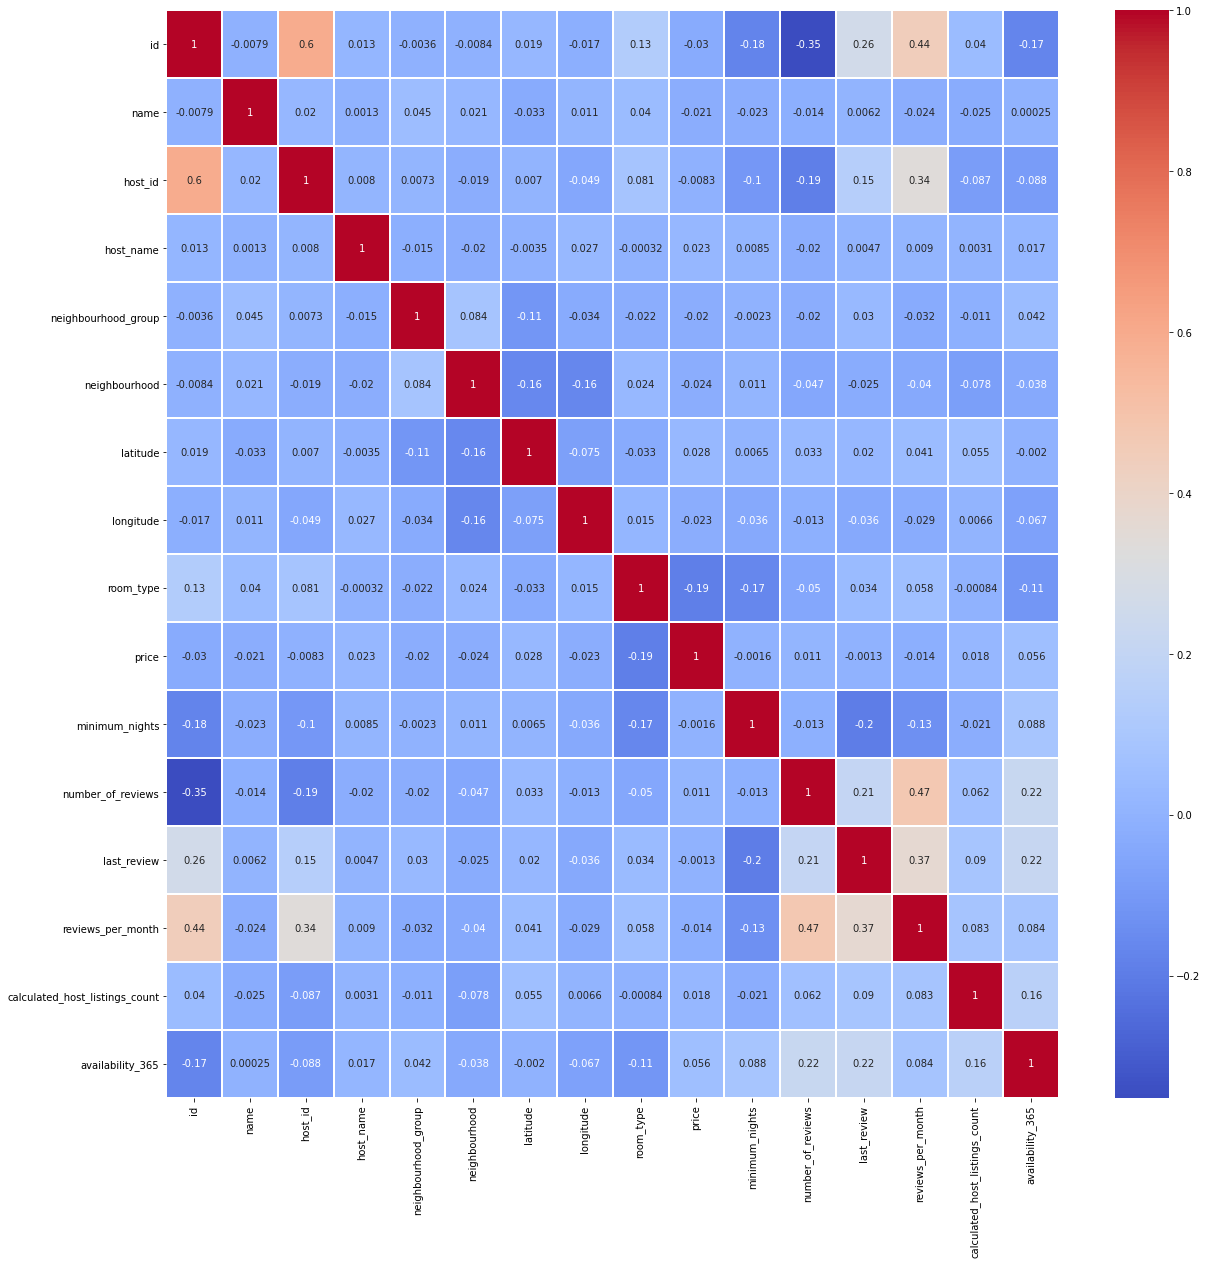

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(datasets.corr(),
            cmap='coolwarm',
            annot=True,linewidths=1);


In [16]:
newdata = ["id","number_of_reviews","reviews_per_month"]
databaru= datasets[newdata]
databaru.head()
print(databaru)

             id  number_of_reviews  reviews_per_month
0          2015                118               3.76
2          3176                143               1.25
3          3309                 25               0.39
4          7071                197               1.75
6         14325                 23               0.23
...         ...                ...                ...
21412  28490425                 10               6.12
21417  28503342                 12               7.50
21463  28558738                 11               7.67
21506  28622624                 10               6.98
21837  29029427                 10              10.00

[7769 rows x 3 columns]


Cek lagi Correlaction antar atribut dengan menggunakan heatmap

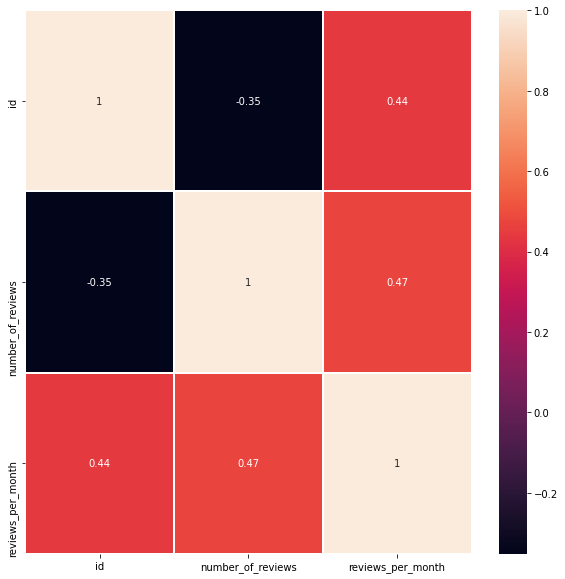

In [17]:
x,y= plt.subplots( figsize=(10 ,10) )
sns.heatmap(databaru.corr(),annot=True,linewidths=1)
plt.show()

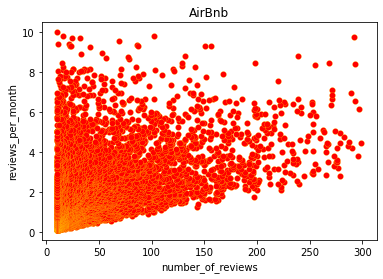

In [18]:
price = datasets['number_of_reviews']
rpm = datasets['reviews_per_month']
plt.scatter(price, rpm, c='r', edgecolors='yellow', linewidth=0.19)
plt.title('AirBnb')
plt.xlabel('number_of_reviews')
plt.ylabel('reviews_per_month')
plt.show()

Boxplot digunakan untuk mencari outlier yaitu data yang menyimpang dari sekumpulan data yang lain

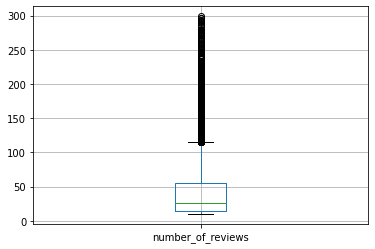

In [19]:
databaru.boxplot(column=["number_of_reviews"])

In [0]:
databaru.drop(databaru[databaru.number_of_reviews >= 100].index ,inplace =True)

In [21]:
databaru

,id,number_of_reviews,reviews_per_month
3,3309,25,0.39
6,14325,23,0.23
8,16644,48,0.47
11,20858,56,0.75
12,21869,60,0.61
...,...,...,...
21412,28490425,10,6.12
21417,28503342,12,7.50
21463,28558738,11,7.67
21506,28622624,10,6.98


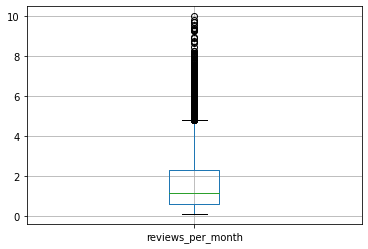

In [22]:
databaru.boxplot(column=["reviews_per_month"])

In [0]:
databaru.drop(databaru[databaru.reviews_per_month > 3].index ,inplace =True)

In [24]:
databaru

,id,number_of_reviews,reviews_per_month
3,3309,25,0.39
6,14325,23,0.23
8,16644,48,0.47
11,20858,56,0.75
12,21869,60,0.61
...,...,...,...
20114,26808026,11,2.92
20120,26812711,10,2.59
20180,26905918,10,2.65
20367,27165606,10,2.80


Melakukan Feature Scaling pada Dataset yang bertujuan untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama.

In [25]:
mms = MinMaxScaler()
scaler = mms.fit_transform(databaru)
col_new = ["id","number_of_reviews","reviews_per_month"]
datascalling = pd.DataFrame(scaler,columns=col_new)
datascalling

,id,number_of_reviews,reviews_per_month
0,0.000000,0.168539,0.093750
1,0.000405,0.146067,0.038194
2,0.000490,0.426966,0.121528
3,0.000645,0.516854,0.218750
4,0.000682,0.561798,0.170139
...,...,...,...
5751,0.984578,0.011236,0.972222
5752,0.984750,0.000000,0.857639
5753,0.988174,0.000000,0.878472
5754,0.997712,0.000000,0.930556


Dataset Hasil Explorasi

In [0]:
datascalling.to_csv('Prep_airbnb.csv')

Langkah-langkah Clustering

1.   Langkah 1: Tentukan berapa banyak cluster k dari dataset yang akan dibagi.
2.   Langkah 2: Tetapkan secara acak data k menjadi pusat awal lokasi klaster.
3.   Langkah 3: Untuk masing-masing data, temukan pusat cluster terdekat. Dengan demikian berarti masing-masing pusat cluster memiliki sebuah subset dari dataset, sehingga mewakili bagian dari dataset. Oleh karena itu, telah terbentuk cluster k: C1, C2, C3, …, Ck .
4. Langkah 4: Untuk masing-masing cluster k, temukan pusat luasan klaster, dan perbarui lokasi dari masing-masing  pusat cluster ke nilai baru dari  pusat luasan.
5. Langkah 5: Ulangi langkah ke-3 dan ke-5 hingga data-data pada tiap cluster menjadi terpusat atau selesai.


CLustering menggunakan data yang telah di Scale

 Metode Elbow

Text(0, 0.5, 'Sum of Squarred errors')

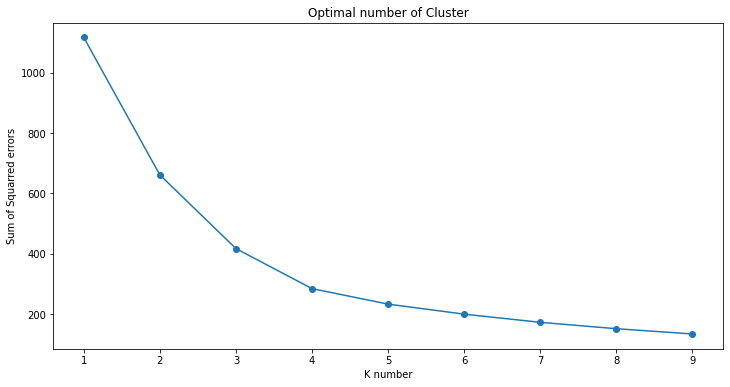

In [27]:
from sklearn.cluster import KMeans
SSE = []
for cluster in range(1,10):
    kmeans = KMeans( n_clusters = cluster)
    kmeans.fit(datascalling)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.title('Optimal number of Cluster')
plt.xlabel('K number')
plt.ylabel('Sum of Squarred errors')

Clustering Menggunakan K-Means dengan Scalling

# Clustering Model 1 

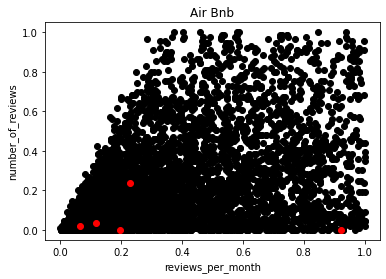

In [28]:
kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit(datascalling)
labels = kmeans.predict(datascalling)
newscale = datascalling[["reviews_per_month","number_of_reviews"]]
K=5
Centroids = (newscale.sample(K))
plt.scatter(newscale["reviews_per_month"],newscale["number_of_reviews"],c='black')
plt.scatter(Centroids["reviews_per_month"],Centroids["number_of_reviews"],c='red')
plt.title('Air Bnb')
plt.xlabel('reviews_per_month')
plt.ylabel('number_of_reviews')
plt.show()

In [29]:
diff = 1
j=0
Centroids = (newscale.sample(K))
while(diff!=0):
    XD=newscale
    i=1
    for index1,row_centro in Centroids.iterrows():
      list1=[]
      for index2,row_centro1 in XD.iterrows():
        distance1 = (row_centro["reviews_per_month"]-row_centro1["reviews_per_month"])**2 
        distance2 = (row_centro["number_of_reviews"]-row_centro1["number_of_reviews"])**2
        distance = np.sqrt(distance1+distance2)
        list1.append(distance)
      newscale[i]=list1
      i=i+1

    list2=[]
    for index2,row in newscale.iterrows():
      min_dist=row[1]
      index3=1
      for i in range(K):
        if row[i+1] < min_dist:
          min_dist = row[i+1]
          index3=i+1
      list2.append(index3)
    newscale["Cluster"]=list2
    Centroids_new = newscale.groupby(["Cluster"]).mean()[["number_of_reviews","reviews_per_month"]]
    if j == 0:
        diff=1
        j=j+1
    else:
      diff = (Centroids_new['number_of_reviews'] - Centroids['number_of_reviews']).sum() + (Centroids_new['reviews_per_month'] - Centroids['reviews_per_month']).sum()
      print(diff.sum())
    Centroids = newscale.groupby(["Cluster"]).mean()[["number_of_reviews","reviews_per_month"]]

0.2301240701044861
0.23719051314506256
0.25222198809039087
0.21424457743165873
0.18123761569800823
0.13603664523432557
0.11573597114705754
0.0962455592038646
0.0814422394012112
0.06083791041438531
0.04858560999653083
0.0291412899975472
0.019202062315401114
0.016694879842667654
0.014765542521538305
0.01172030213582717
0.009871416252918638
0.005670100248425999
0.004637731791477986
0.004866196310028187
0.004730738506748017
0.002353088466260478
0.002948743490008468
0.002192092447637309
0.0014718990708865454
0.0010097137205819506
0.0


5


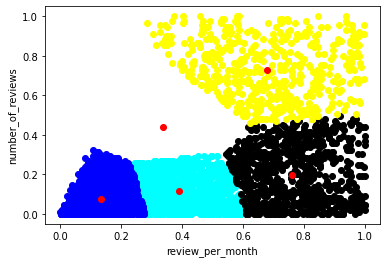

In [30]:
color=['red','cyan','black','yellow','blue']
print(K)
for i in range(K):
    data=newscale[newscale["Cluster"]==i]
    plt.scatter(data["reviews_per_month"],data["number_of_reviews"],c=color[i])
plt.scatter(Centroids["reviews_per_month"],Centroids["number_of_reviews"],c='red')
plt.xlabel('review_per_month')
plt.ylabel('number_of_reviews')
plt.show()

In [31]:
frame = pd.DataFrame(datascalling)
frame['cluster'] = labels
frame['cluster']
frame

datascalling.loc[datascalling['cluster']==0,'cluster'] = 'Tidak Bagus'
datascalling.loc[datascalling['cluster']==1,'cluster'] = 'Kurang Bagus'
datascalling.loc[datascalling['cluster']==2,'cluster'] = 'Bagus'

datascalling

,id,number_of_reviews,reviews_per_month,cluster
0,0.000000,0.168539,0.093750,Bagus
1,0.000405,0.146067,0.038194,Bagus
2,0.000490,0.426966,0.121528,Bagus
3,0.000645,0.516854,0.218750,Kurang Bagus
4,0.000682,0.561798,0.170139,Kurang Bagus
...,...,...,...,...
5751,0.984578,0.011236,0.972222,Tidak Bagus
5752,0.984750,0.000000,0.857639,Tidak Bagus
5753,0.988174,0.000000,0.878472,Tidak Bagus
5754,0.997712,0.000000,0.930556,Tidak Bagus


In [32]:
datascalling.groupby("cluster").size()

cluster
Bagus           2346
Kurang Bagus     986
Tidak Bagus     2424
dtype: int64

Selesai melakukan Cluster dan memberi Labelnya aku mengexport hasilnya dalam bentuk csv

In [0]:
datascalling.to_csv('clusterdenganscalling.csv')

# Clustering Model 2


Clustering Menggunakan K-Means tanpa Scalling

Metode ELBOW

Text(0, 0.5, 'Square Distances')

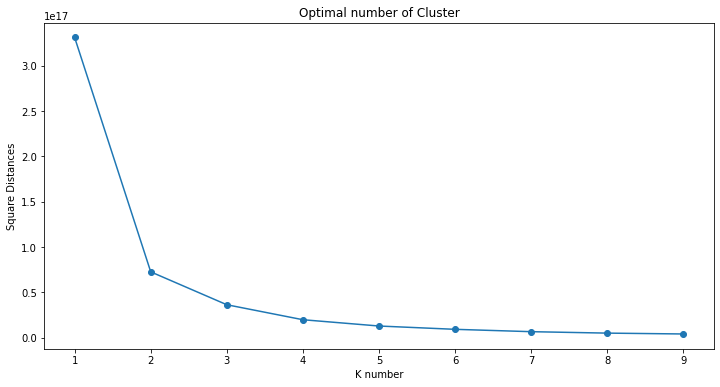

In [34]:
from sklearn.cluster import KMeans
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(databaru)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.title('Optimal number of Cluster')
plt.xlabel('K number')
plt.ylabel('Square Distances')

Clustering Model 2 tanpa Scalling





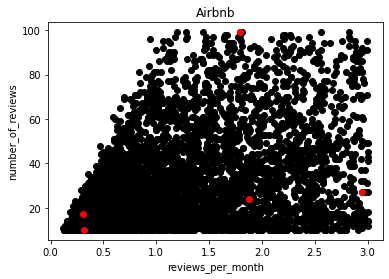

In [35]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(databaru)
labels = kmeans.predict(databaru)
databaru1 = databaru[["reviews_per_month","number_of_reviews"]]
K=5
Centroids1 = (databaru1.sample(K))
plt.scatter(databaru1["reviews_per_month"],databaru1["number_of_reviews"],c='black')
plt.scatter(Centroids1["reviews_per_month"],Centroids1["number_of_reviews"],c='red')
plt.title('Airbnb')
plt.xlabel('reviews_per_month')
plt.ylabel('number_of_reviews')
plt.show()

In [44]:

diff = 1
j=0
Centroids1 = (databaru1.sample(K))
while(diff!=0):
    XD=databaru1
    i=1
    for index1,row_centro in Centroids1.iterrows():
      list1=[]
      for index2,row_centro1 in XD.iterrows():
        distance1 = (row_centro["reviews_per_month"]-row_centro1["reviews_per_month"])**2 
        distance2 = (row_centro["number_of_reviews"]-row_centro1["number_of_reviews"])**2
        distance = np.sqrt(distance1+distance2)
        list1.append(distance)
      databaru1[i]=list1
      i=i+1

    list2=[]
    for index2,row in databaru1.iterrows():
      min_dist=row[1]
      index3=1
      for i in range(K):
        if row[i+1] < min_dist:
          min_dist = row[i+1]
          index3=i+1
      list2.append(index3)
    databaru1["Cluster"]=list2
    Centroids_new = databaru1.groupby(["Cluster"]).mean()[["number_of_reviews","reviews_per_month"]]
    if j == 0:
        diff=1
        j=j+1
    else:
      diff = (Centroids_new['number_of_reviews'] - Centroids1['number_of_reviews']).sum() + (Centroids_new['reviews_per_month'] - Centroids1['reviews_per_month']).sum()
      print(diff.sum())
    Centroids1 = databaru1.groupby(["Cluster"]).mean()[["number_of_reviews","reviews_per_month"]]

7.656926382678051
5.215941371661641
4.4699743978686595
3.965184054752215
3.133380472679804
3.3489455886362567
2.6474488036325403
2.769956570335033
1.707128726308187
2.0510419894308427
1.781507191929897
2.0128947118482197
1.0616635191898793
1.0372341302508654
0.9949576985594686
0.0


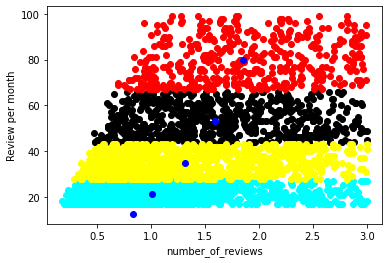

In [46]:
color=['green','cyan','black','yellow','red']
for i in range(K):
    data=databaru[databaru1["Cluster"]==i]
    plt.scatter(data["reviews_per_month"],data["number_of_reviews"],c=color[i])
plt.scatter(Centroids1["reviews_per_month"],Centroids1["number_of_reviews"],c='blue')
plt.xlabel('number_of_reviews')
plt.ylabel('Review per month')
plt.show()

In [47]:
frame = pd.DataFrame(databaru)
frame['cluster'] = labels
frame


databaru.loc[databaru['cluster']==0,'cluster'] = 'Tidak Bagus'
databaru.loc[databaru['cluster']==1,'cluster'] = 'Kurang Bagus'
databaru.loc[databaru['cluster']==2,'cluster'] = 'Bagus'
databaru

,id,number_of_reviews,reviews_per_month,cluster
3,3309,25,0.39,Tidak Bagus
6,14325,23,0.23,Tidak Bagus
8,16644,48,0.47,Tidak Bagus
11,20858,56,0.75,Tidak Bagus
12,21869,60,0.61,Tidak Bagus
...,...,...,...,...
20114,26808026,11,2.92,Bagus
20120,26812711,10,2.59,Bagus
20180,26905918,10,2.65,Bagus
20367,27165606,10,2.80,Bagus


In [48]:
databaru.groupby("cluster").size()

cluster
Bagus           1924
Kurang Bagus    1661
Tidak Bagus     2171
dtype: int64

Selesai melakukan Cluster dan memberi Labelnya aku mengexport hasilnya dalam bentuk csv

In [0]:
databaru.to_csv('clustertanpascalling.csv')

# Classification

**Split Dataset 80% Train 20% Test**



In [51]:
datascalling

,id,number_of_reviews,reviews_per_month,cluster
0,0.000000,0.168539,0.093750,Bagus
1,0.000405,0.146067,0.038194,Bagus
2,0.000490,0.426966,0.121528,Bagus
3,0.000645,0.516854,0.218750,Kurang Bagus
4,0.000682,0.561798,0.170139,Kurang Bagus
...,...,...,...,...
5751,0.984578,0.011236,0.972222,Tidak Bagus
5752,0.984750,0.000000,0.857639,Tidak Bagus
5753,0.988174,0.000000,0.878472,Tidak Bagus
5754,0.997712,0.000000,0.930556,Tidak Bagus


In [0]:
x = datascalling[['number_of_reviews','reviews_per_month']]
y = datascalling[['cluster']]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# Model 1 Klasifikasi dengan Naive Bayes untuk Task 2

In [54]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Buat model Gaussian Classifier
model = GaussianNB()

#Latih model menggunakan data latih
model.fit(X_train, y_train)

#Prediksi respons untuk dataset uji
y_pred_NB = model.predict(X_test)
y_pred_NB

array(['Kurang Bagus', 'Bagus', 'Tidak Bagus', ..., 'Tidak Bagus',
       'Bagus', 'Bagus'], dtype='<U12')

Akurasi Naive Bayes

In [55]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 



y_true = y_test
results = confusion_matrix(y_true, y_pred_NB) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_NB))
print('Report : ')
print(classification_report(y_true, y_pred_NB))

Confusion Matrix :
[[418  10  23]
 [  0 191   9]
 [132  28 341]]
Accuracy Score : 0.8246527777777778
Report : 
              precision    recall  f1-score   support

       Bagus       0.76      0.93      0.84       451
Kurang Bagus       0.83      0.95      0.89       200
 Tidak Bagus       0.91      0.68      0.78       501

    accuracy                           0.82      1152
   macro avg       0.84      0.85      0.84      1152
weighted avg       0.84      0.82      0.82      1152



# Model 2 Klasifikasi dengan ID3 untuk Task 2

In [56]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(X_train,y_train)
y_pred_ID3 = model_dt.predict(X_test)
y_pred_ID3

array(['Kurang Bagus', 'Bagus', 'Tidak Bagus', ..., 'Tidak Bagus',
       'Bagus', 'Tidak Bagus'], dtype=object)

Akurasi ID3

In [57]:
y_true = y_test
results = confusion_matrix(y_true, y_pred_ID3) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_ID3))
print('Report : ')
print(classification_report(y_true, y_pred_ID3))

Confusion Matrix :
[[428   2  21]
 [  0 191   9]
 [ 32   9 460]]
Accuracy Score : 0.9366319444444444
Report : 
              precision    recall  f1-score   support

       Bagus       0.93      0.95      0.94       451
Kurang Bagus       0.95      0.95      0.95       200
 Tidak Bagus       0.94      0.92      0.93       501

    accuracy                           0.94      1152
   macro avg       0.94      0.94      0.94      1152
weighted avg       0.94      0.94      0.94      1152



In [58]:
from sklearn import metrics
print("Akurasi :",metrics.accuracy_score(y_true, y_pred_NB))

Akurasi : 0.8246527777777778


# Evaluasi 2 Model

Perbandingan Hasil Akurasi

In [59]:
result_class = pd.DataFrame({
    'Hasil Sebenarnya': y_true['cluster'],
    'Naive Bayes': y_pred_NB,
    'ID3' : y_pred_ID3
})

result_class

,Hasil Sebenarnya,Naive Bayes,ID3
2351,Kurang Bagus,Kurang Bagus,Kurang Bagus
886,Bagus,Bagus,Bagus
5065,Tidak Bagus,Tidak Bagus,Tidak Bagus
5103,Tidak Bagus,Tidak Bagus,Tidak Bagus
2949,Kurang Bagus,Kurang Bagus,Tidak Bagus
...,...,...,...
3720,Tidak Bagus,Tidak Bagus,Tidak Bagus
2540,Bagus,Bagus,Bagus
5472,Tidak Bagus,Tidak Bagus,Tidak Bagus
58,Bagus,Bagus,Bagus


Tidak menggunakan data Scalling

In [0]:
x1 = databaru[['number_of_reviews','reviews_per_month']]
y1 = databaru[['cluster']]

In [0]:
X1_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size = 0.2)

# Model 1 Klasifikasi dengan Naive Bayes untuk Task 2 ( Tanpa Scalling)

In [62]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Buat model Gaussian Classifier
model = GaussianNB()

#Latih model menggunakan data latih
model.fit(X_train, y_train)

#Prediksi respons untuk dataset uji
y_pred_NB = model.predict(X_test)
y_pred_NB

array(['Kurang Bagus', 'Kurang Bagus', 'Kurang Bagus', ...,
       'Kurang Bagus', 'Kurang Bagus', 'Kurang Bagus'], dtype='<U12')

Akurasi 


In [63]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


y_true = y_test
results = confusion_matrix(y_true, y_pred_NB) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_NB))
print('Report : ')
print(classification_report(y_true, y_pred_NB))

Confusion Matrix :
[[  0 413   0]
 [  0 345   0]
 [  0 394   0]]
Accuracy Score : 0.2994791666666667
Report : 
              precision    recall  f1-score   support

       Bagus       0.00      0.00      0.00       413
Kurang Bagus       0.30      1.00      0.46       345
 Tidak Bagus       0.00      0.00      0.00       394

    accuracy                           0.30      1152
   macro avg       0.10      0.33      0.15      1152
weighted avg       0.09      0.30      0.14      1152



Model 1 Klasifikasi dengan ID3 untuk Task 2 ( Tanpa Scalling)


In [64]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(X_train,y_train)
y_pred_ID3 = model_dt.predict(X_test)
y_pred_ID3

array(['Kurang Bagus', 'Bagus', 'Bagus', ..., 'Bagus', 'Bagus',
       'Kurang Bagus'], dtype=object)

Akurasi

In [65]:
y_true = y_test
results = confusion_matrix(y_true, y_pred_ID3) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_ID3))
print('Report : ')
print(classification_report(y_true, y_pred_ID3))

Confusion Matrix :
[[339  28  46]
 [174  84  87]
 [147 148  99]]
Accuracy Score : 0.453125
Report : 
              precision    recall  f1-score   support

       Bagus       0.51      0.82      0.63       413
Kurang Bagus       0.32      0.24      0.28       345
 Tidak Bagus       0.43      0.25      0.32       394

    accuracy                           0.45      1152
   macro avg       0.42      0.44      0.41      1152
weighted avg       0.43      0.45      0.42      1152



Evaluasi 2 Model ( Tanpa Scalling)

In [66]:
result_class1 = pd.DataFrame({
    'Hasil Sebenarnya': y_true['cluster'],
    'Naive Bayes': y_pred_NB,
    'ID3' : y_pred_ID3
})

result_class1

,Hasil Sebenarnya,Naive Bayes,ID3
1172,Tidak Bagus,Kurang Bagus,Kurang Bagus
10100,Kurang Bagus,Kurang Bagus,Bagus
3732,Tidak Bagus,Kurang Bagus,Bagus
11417,Bagus,Kurang Bagus,Tidak Bagus
10753,Kurang Bagus,Kurang Bagus,Bagus
...,...,...,...
2841,Tidak Bagus,Kurang Bagus,Bagus
13422,Bagus,Kurang Bagus,Kurang Bagus
1504,Tidak Bagus,Kurang Bagus,Bagus
16719,Bagus,Kurang Bagus,Bagus


Dari hasil diatas, dapat disimpulkan bahwa Klasifikasi dengan melakukan Scalling terlebih dahulu untuk atribut reviews_per_month dan number of reviews berhasil mendapatkan akurasi sebesar 82,2% dengan data training dan testing 80-20 dengan algoritma Naïve Bayes dan dengan menggunakan  ID3 mendpat akurasi sebesar 92,7% dengan data training dan testing 80-20
Dan Klasifikasi tanpa melakukan Scalling untuk atribut reviews_per_month dan number of reviews berhasil mendapatkan akurasi sebesar 32,8% dengan data training dan testing 80-20 dengan algoritma Naïve Bayes dan dengan menggunakan  ID3 mendpat akurasi sebesar 0,29% dengan data training dan testing 80-20. Dapat disimpulkan bahwa, mengunakan persiapan data yang berbeda dapat mempengaruhi hasil akurasi yang didapat. Selain, itu teknik scaling sangat mempengaruhi hasil akurasi.
